<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/British-Airway-Virtual-Internship/blob/main/Random_forest_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
from IPython.display import display
from random import randint

bookings = pd.read_csv('/content/customer_booking.csv', encoding ="ISO-8859-1" )
print(bookings.info())

flight_day = bookings['flight_day'].unique()
print(flight_day)

#To map nnumbers to the unique days
mapping = {'Mon': 1,
           'Tue': 2,
           'Wed': 3,
           'Thu': 4,
           'Fri': 5,
           'Sat': 6,
           'Sun': 7,
           }

#To change the flight day column
bookings['flight_day']=bookings['flight_day'].map(mapping)
print(bookings['flight_day'].unique())








<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [3]:
#Training and testing models
X = bookings.drop('booking_complete', axis = 1)
y = bookings['booking_complete']

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
print(X.dtypes)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=21,stratify=y)

#Instantiate the model
rcf = RandomForestClassifier()

#fit the trained data into the classifer
rcf.fit(X_train,y_train)

#prediction
y_pred = rcf.predict(X_test)

#accuracy
accuracy =  accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object
Accuracy:  0.8525


the best estimator: RandomForestClassifier(max_depth=17, n_estimators=290)
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     17009
           1       0.56      0.07      0.13      2991

    accuracy                           0.85     20000
   macro avg       0.71      0.53      0.52     20000
weighted avg       0.81      0.85      0.80     20000



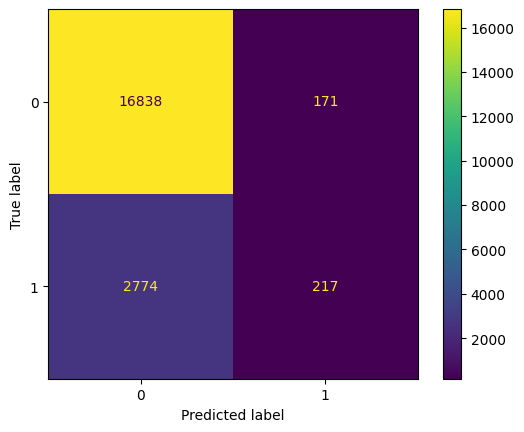

In [4]:
#Hyperparameter tuning
param_distribution ={'n_estimators': range(50,500,10),
                     'max_depth': range(1,20,2)}

#create a classifier
rcf = RandomForestClassifier()

param = RandomizedSearchCV(rcf, param_distribution, cv =5)

#fit the trained set into param
param.fit(X_train,y_train)

#create variable for model
best_estimator = param.best_estimator_

print("the best estimator:", best_estimator)
#Prediction
y_pred = best_estimator.predict(X_test)

#confusion Matrix
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

#Compute resulting matrix
cr = classification_report(y_test,y_pred)
print(cr)

In [6]:
#Further tuning

rcf = RandomForestClassifier()
rcf.fit(X_train,y_train)
y_pred = rcf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
recallscore = recall_score(y_test,y_pred)
precisionscore = precision_score(y_test,y_pred)
print('accuracy score:', accuracy,
      'recall score:', recallscore,
      'prediction score:', precisionscore)

accuracy score: 0.8515 recall score: 0.10531594784353059 prediction score: 0.5172413793103449


<Axes: >

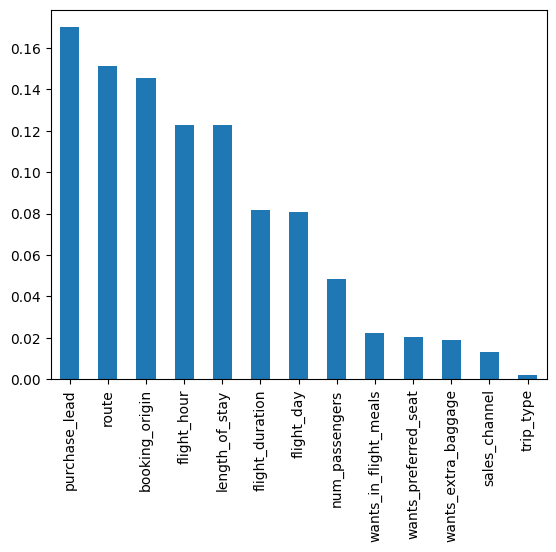

In [8]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_estimator.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()
